# **INSPECCIÓN PRINCIPAL BASE DE DATOS**
Cybersecurity Intrusion Detection Dataset, es una base de datos que recopila información relacionada principalmente a los patrones de comportamiento del usuario y el tráfico de red, tal como lo describe el autor. El Dataset cuenta con 11 columnas con 9537 registros (filas), distribuidos de la siguiente manera:

### **Variables categóricas:**
1.	**Encryption_used:**
Indica el tipo de encriptación aplicado en la conexión. Sus categorías son:
-	AES: Estándar de cifrado avanzado, fuerte y ampliamente utilizado.
-	DES: Estándar antiguo de cifrado de datos.
-	Ninguna encriptación: No se usó ningún método de encriptación.
2.	**Protocol_type:**
Representa el protocolo utilizado en la comunicación:
-TCP (Protocolo de Control de Transmisión).
-UDP (Protocolo de Datagramas del Usuario).
-ICMP (Protocolo de Mensajes de Control de Internet, usado en diagnósticos).
3. **Browser_type:** Tipo de navegador utilizado por el usuario.
4.	**Unusual_time_access:** Con registro binario que indica si inicio sesión fuera del horario normal.
5. **Attack_detected:** Variable con clasificación binaria que determina si recibió un ataque o no.
### **Variables númericas:**
-	**Asociadas al tráfico de red:**
 6.	**Network_packet_size:** Tamaño de paquetes de bytes que oscila entre 64 y 1500 bytes.
-	**Asociadas al comportamiento del usuario:**
 7.	**Login_attempts:** Intentos de inicio de sesión típicos de los usuarios
 8.	**Session_duration:** Tiempo de sesión iniciada.
 9.	**Failed_logins:** Número de inicios de sesión fallidos.
 10.	**Ip_reputation_score:** Mide y clasifica la confiabilidad de la dirección IP.
### **Otras**
11. **Session_id:** Número de ID de la sesión del usuario.
### **Nuevas variables**
12. **Minutos_sesion:** Cantidad de minutos de sesión iniciada relacionado con **Sesion_duration**.
13. **accesos_fallidos:** Mapeo especial creado a partir del **login_attempts**.
14. **paquetes_bytes:** Mapeo especial creado a partir del **network_packet_size**.


## **Vista previa del dataset**

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/jdrodriguez03/proyecto-final-progra-2/main/data/cybersecurity_intrusion_data.csv"
df = pd.read_csv(url)
df = pd.read_csv(url, encoding="utf-8")
print(df.head())

  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Firefox                    0 

### **Información Géneral**
- Número de filas, columnas con su nombre.
- Clasificación de tipo de datos: Object, float, int, etc.
- Valores no nulos.
- Cantidad de registros por columna.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


### **Inspección y tratamiento de datos faltantes**
Se ejecuta el código para poder visualizar los datos faltantes:
1. Tabla pequeña del total de valores faltantes normal y porcentual.
2. Mapa de valores faltantes, facilíta la visualización.
3. Imputación de los datos faltantes.
4. Nuevo mapa.

In [3]:
"""
Tabla normal de valores faltantes
"""
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [4]:
"""
Tabla de con porcentajes de valores faltantes
"""
(df.isnull().sum() / len(df)) * 100

session_id              0.000000
network_packet_size     0.000000
protocol_type           0.000000
login_attempts          0.000000
session_duration        0.000000
encryption_used        20.614449
ip_reputation_score     0.000000
failed_logins           0.000000
browser_type            0.000000
unusual_time_access     0.000000
attack_detected         0.000000
dtype: float64

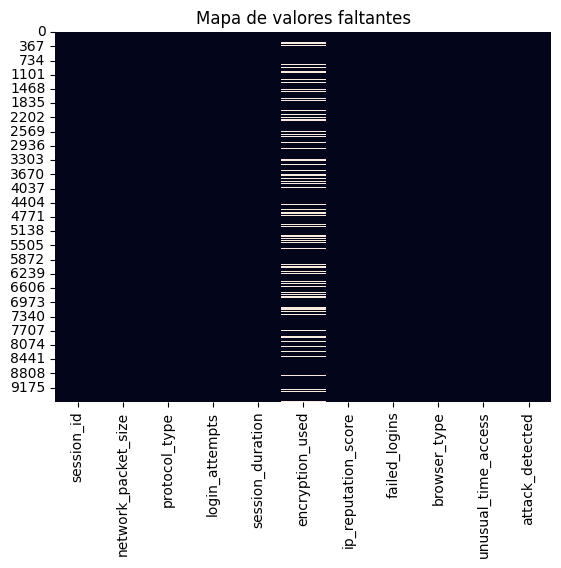

In [6]:
"""
 Mapa de valores faltantes
"""
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

De acuerdo con el mapa, hay 1.966 valores faltantes en encryption_used. Sin embargo, según la información proporcionada en Kaggle, los datos nulos representan comunicación no cifrada y, durante la imputación, se les asignó el valor "Ninguna_encript".

In [7]:
"""
Imputación
"""
valor="Ninguna_encript"
df['encryption_used']=df['encryption_used'].fillna(valor)

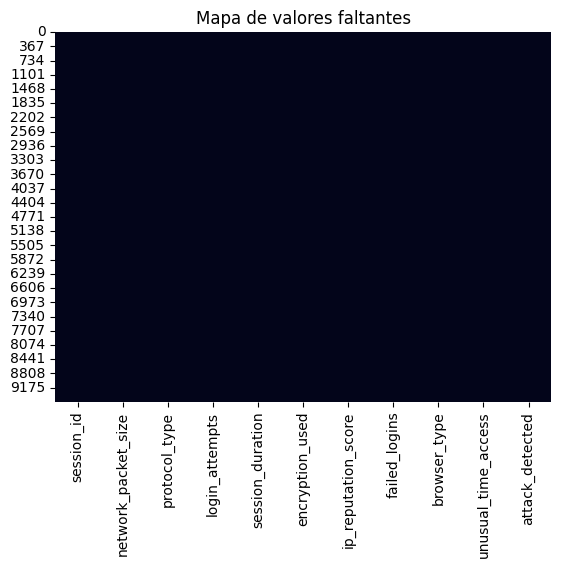

In [8]:
"""
Nueva visualización
"""
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()


### **MAPEO DEL DATASET**
Durante el proceso de limpieza del dataset, se realizó un análisis de las variables categóricas encryption_used, protocol_type y browser_type mediante la función value_counts, con el fin de identificar posibles inconsistencias en los textos y evitar la presencia de categorías repetidas que pudieran alterar el análisis de los datos.

In [9]:
"""
Primer análisis para mapeo
"""
df["encryption_used"].value_counts()

encryption_used
AES                4706
DES                2865
Ninguna_encript    1966
Name: count, dtype: int64

In [10]:
"""
Segundo análisis para mapeo
"""
df["protocol_type"].value_counts()

protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64

In [11]:
"""
Tercer análisis para mapeo
"""
df["browser_type"].value_counts()

browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64

### **Datos Duplicados**
Búsqueda de registros duplicados en el dataset.

In [12]:
df[df.duplicated(keep=False)]

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
